In [1]:
import os
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from skimage.io import imread, imshow
from skimage.transform import resize

train_male_path = r"E:\python files\amakusadio\Training\amakusadaio male edit"
train_female_path = r"E:\python files\amakusadio\Training\amakusadaio female edit"
test_male_path = r"E:\python files\amakusadio\Testing\A_male"
test_female_path = r"E:\python files\amakusadio\Testing\A_female"

# Function to load images and extract features
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder, filename))
        if img is not None:
            img = resize(img, (100, 100))  # Resize image to a fixed size
            images.append(img.flatten())  # Flatten image into a 1D array
    return images

# Load train images
train_male_images = load_images_from_folder(train_male_path)
train_female_images = load_images_from_folder(train_female_path)

# Load test images
test_male_images = load_images_from_folder(test_male_path)
test_female_images = load_images_from_folder(test_female_path)

# Create labels for train and test images
train_male_labels = np.zeros(len(train_male_images))
train_female_labels = np.ones(len(train_female_images))

test_male_labels = np.zeros(len(test_male_images))
test_female_labels = np.ones(len(test_female_images))

# Combine train and test images and labels
train_images = np.concatenate((train_male_images, train_female_images))
train_labels = np.concatenate((train_male_labels, train_female_labels))

test_images = np.concatenate((test_male_images, test_female_images))
test_labels = np.concatenate((test_male_labels, test_female_labels))

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(train_images, train_labels)

# Predict on the test set
test_predictions = clf.predict(test_images)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)

In [9]:
print(accuracy)

0.98


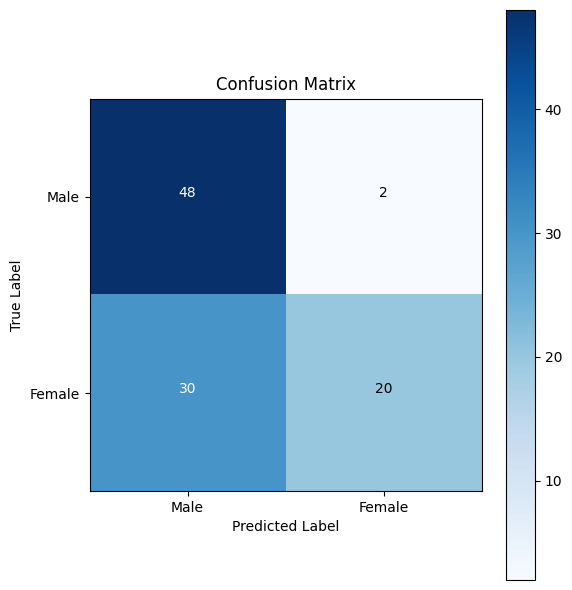

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Create labels for the matrix
labels = ['Male', 'Female']

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Add values to the matrix
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()